<a href="https://colab.research.google.com/github/Nagarjun-CS/Applicatoin-Subscription-Trend-Analysis-and-Churn-Prediction/blob/main/Application_Subscription_Promotion_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Application Subscription Trend Analysis and Churn Prediction**

# **Introduction**

In today's highly competitive subscription-based businesses, understanding customer behavior is crucial for maximizing revenue and minimizing customer churn. Customer churn refers to the phenomenon where customers stop using or paying for a service. Identifying customers who are likely to churn in advance can help businesses implement retention strategies, ultimately reducing revenue loss.

This project aims to analyze the subscription trends of customers and build a predictive model to identify those who are at risk of churning. By analyzing historical customer data, we can uncover patterns that contribute to customer attrition and create actionable insights to improve customer retention.

# **Ideology**

The core ideology of this project revolves around data-driven decision-making. Subscription-based services generate large amounts of customer data that can reveal significant insights into customer behavior. By leveraging machine learning and data analytics, businesses can:

Understand customer engagement trends.
Predict customers likely to churn based on historical data.
Proactively engage with at-risk customers through targeted retention strategies.
At the heart of this project is the belief that by identifying early indicators of customer dissatisfaction or disinterest, companies can minimize churn, optimize customer lifetime value, and enhance customer satisfaction.

# **Approach**
The approach to this project involves several key steps, detailed below:

1.   **Data Collection and Preprocessing:** Gather customer data, including subscription type, monthly revenue, join date, last payment date, demographics (e.g., age, gender, country), and device usage.
Perform data cleaning and preprocessing, such as handling missing values, transforming date fields, and encoding categorical variables.

2.   **Feature Engineering:** Create additional features like subscription tenure (how long a customer has been subscribed), days since the last payment, and other derived metrics that can help in identifying churn behavior.

3.   **Churn Definition:** Define churn based on customer payment behavior. In this case, a customer is marked as “churned” if the last payment was made more than 30 days ago, indicating the customer has likely stopped using the service.

4.   **Exploratory Data Analysis (EDA):** Analyze subscription trends, such as how churn rates vary by subscription type, customer age, country, and other factors.
Visualize these trends to gain deeper insights into customer behavior.

5.   **Churn Prediction Modeling:** Build machine learning models to predict customer churn using historical data. Various classification algorithms such as Logistic Regression, Random Forest, and Gradient Boosting will be tested to find the most accurate model.

6.   **Model Evaluation:** Evaluate the models using metrics like accuracy, precision, recall, F1-score, and AUC-ROC to assess how well the model predicts churn. Hyperparameter tuning will be used to optimize the model’s performance.

7.   **Insights and Recommendations:** Based on the analysis and the churn prediction model, provide actionable insights to improve customer retention strategies and target at-risk customers effectively.


# **Goal**
The primary goal of this project is to analyze customer subscription trends and predict churn using historical customer data. Specifically, this project aims to:

1.  Identify customers who are likely to stop subscribing in the near future.
2.   Uncover the key factors contributing to customer churn.
3.   Provide actionable insights that can help businesses improve customer retention rates.
4.   Build a machine learning model that can accurately predict whether a customer is at risk of churning.





# **Code**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from datetime import datetime, timedelta

In [3]:
pip install geopandas matplotlib


In [4]:
pip install folium

In [5]:
Dataset = pd.read_csv("/content/drive/MyDrive/Data Analysis Projects/Apllication Userbase.csv")
Dataset

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [6]:
Dataset.keys()

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [7]:
userDatabase = Dataset.copy()

In [8]:
userDatabase.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


**This code converts the 'Last Payment Date' to a datetime format and calculates customer churn. Churn is determined by checking if the last payment was made more than 30 days before a specified date (August 01, 2023). A new 'Customer Churn' column is created, marking customers as churned (1) or not churned (0), and the relevant columns are displayed.**

In [9]:
# Ensure 'Last Payment Date' is in datetime format
userDatabase['Last Payment Date'] = pd.to_datetime(userDatabase['Last Payment Date'], format='%d-%m-%y')

# Define the current assumed date (e.g., August 01, 2023)
current_date_assumed = datetime(2023, 8, 1)

# Calculate churn: If last payment date is more than 30 days before the current assumed date, otherwise 0
userDatabase['Customer Churn'] = (current_date_assumed - userDatabase['Last Payment Date'] > timedelta(days=30)).astype(int)

# Display the updated DataFrame with the 'Customer Churn' column
print(userDatabase[['User ID', 'Last Payment Date', 'Customer Churn']])


      User ID Last Payment Date  Customer Churn
0           1        2023-06-10               1
1           2        2023-06-22               1
2           3        2023-06-27               1
3           4        2023-06-26               1
4           5        2023-06-28               1
...       ...               ...             ...
2495     2496        2023-07-12               0
2496     2497        2023-07-14               0
2497     2498        2023-07-15               0
2498     2499        2023-07-12               0
2499     2500        2023-07-12               0

[2500 rows x 3 columns]


In [10]:
num_churned_customers = userDatabase['Customer Churn'].sum()
num_unchurned_customers = len(userDatabase) - num_churned_customers

# Display the numbers
print(f"Number of Churned Customers: {num_churned_customers}")
print(f"Number of Unchurned Customers: {num_unchurned_customers}")

Number of Churned Customers: 997
Number of Unchurned Customers: 1503


In [11]:
userDatabase

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Customer Churn
0,1,Basic,10,15-01-22,2023-06-10,United States,28,Male,Smartphone,1 Month,1
1,2,Premium,15,05-09-21,2023-06-22,Canada,35,Female,Tablet,1 Month,1
2,3,Standard,12,28-02-23,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,1
3,4,Standard,12,10-07-22,2023-06-26,Australia,51,Female,Laptop,1 Month,1
4,5,Basic,10,01-05-23,2023-06-28,Germany,33,Male,Smartphone,1 Month,1
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,2023-07-12,Spain,28,Female,Smart TV,1 Month,0
2496,2497,Basic,15,04-08-22,2023-07-14,Spain,33,Female,Smart TV,1 Month,0
2497,2498,Standard,12,09-08-22,2023-07-15,United States,38,Male,Laptop,1 Month,0
2498,2499,Standard,13,12-08-22,2023-07-12,Canada,48,Female,Tablet,1 Month,0


In [12]:
userDatabase.isnull().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


# **Exploratory Data Analysis (EDA)**

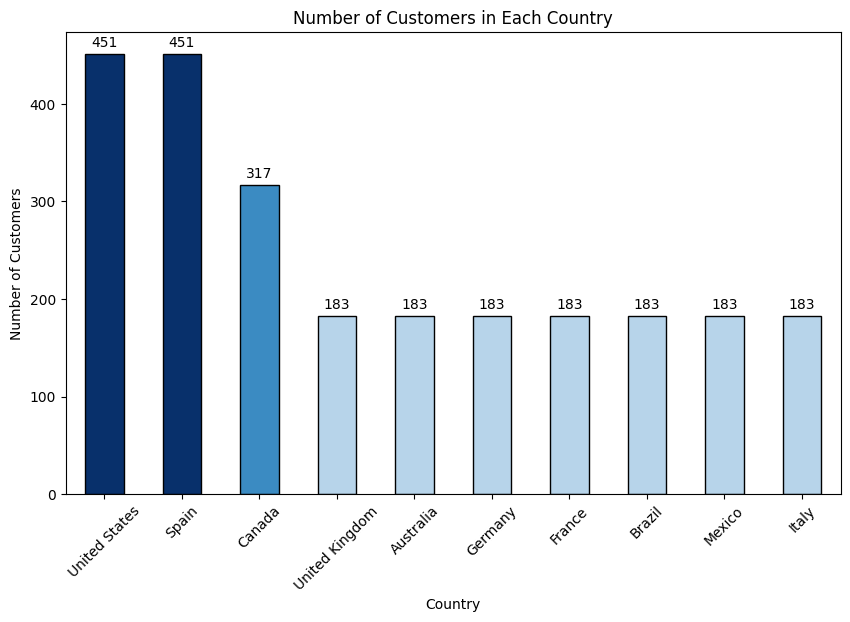

In [13]:
# Count the number of customers in each country
country_counts = userDatabase['Country'].value_counts()

# Sort the countries by user count (this step is crucial to ensure correct color mapping)
sorted_counts = country_counts.sort_values(ascending=False)

# Generate a color gradient from dark to light
# Use np.unique to ensure colors are only assigned differently when counts are different
unique_values = np.unique(sorted_counts)
colors = plt.cm.Blues(np.linspace(0.3, 1, len(unique_values)))

# Map the colors to the sorted counts
color_mapping = {v: colors[i] for i, v in enumerate(unique_values)}
bar_colors = sorted_counts.map(color_mapping)

# Plot the results with the gradient colors
plt.figure(figsize=(10, 6))
bars = sorted_counts.plot(kind='bar', color=bar_colors, edgecolor='black')

# Add numbers on top of the bars
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center',
                  size=10, xytext=(0, 8),
                  textcoords='offset points')

plt.title('Number of Customers in Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()



**Key insights from the bar chart:**

1. **Top Two Markets:** The United States and Spain have the highest number of customers, each with 451 customers, making them the largest markets.

2. **Significant Market:** Canada follows as the third-largest market with 317 customers, significantly lower than the United States and Spain.

3. **Equal Distribution in Other Countries:** Several countries, including the United Kingdom, Australia, Germany, France, Brazil, Mexico, and Italy, have an equal number of customers (183 each), indicating uniform customer presence in these regions.

4. **Potential Focus on Major Markets:** The large disparity between the top three countries and the others suggests a potential opportunity to focus marketing efforts or analyze customer behavior more deeply in the United States, Spain, and Canada to maintain or expand the customer base.

In [14]:
# Count the number of customers in each country
country_counts = userDatabase['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Standardize country names to match those in the geopandas world map
country_counts['Country'] = country_counts['Country'].replace({
    'USA': 'United States of America',
    'United States': 'United States of America',
    'UK': 'United Kingdom',
})

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the country counts
world = world.merge(country_counts, how="left", left_on="name", right_on="Country")

# Fill NaN values with 0 for countries with no data
world['Count'] = world['Count'].fillna(0)

# Create a folium map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add the world map data to the folium map
folium.Choropleth(
    geo_data=world,
    name="choropleth",
    data=world,
    columns=["name", "Count"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Users by Country",
).add_to(m)

# Add hover functionality
folium.GeoJson(
    world,
    style_function=lambda x: {'fillColor': '#ffffff00', 'color': 'black', 'weight': 0.5},
    tooltip=GeoJsonTooltip(
        fields=['name', 'Count'],
        aliases=['Country: ', 'Number of Users: '],
        localize=True
    )
).add_to(m)

# Save the map to an HTML file
m.save("user_distribution_map.html")

# Display the map in Jupyter (if running in a Jupyter environment)
m


<ipython-input-14-87b51e3a320f>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


**Key insights from the geographic heatmap:**

1. **High Customer Concentration:** North America (United States, Canada) and Spain stand out with the darkest shades, indicating they have the highest concentration of customers. These regions are critical markets.

2. **Moderate Customer Base in Europe and Australia:** Other parts of Europe, such as the United Kingdom, Germany, France, and Australia, have a moderate number of customers, represented by the lighter shades compared to North America and Spain.

3. **Lower Customer Presence in Other Regions:** Many regions across Asia, Africa, and South America show very light shades, suggesting a smaller or almost non-existent customer base in these areas.

4. **Potential Expansion Opportunity:** The heatmap indicates that customer acquisition efforts could be expanded into underrepresented regions, such as Asia and Africa, to diversify and grow the customer base globally.

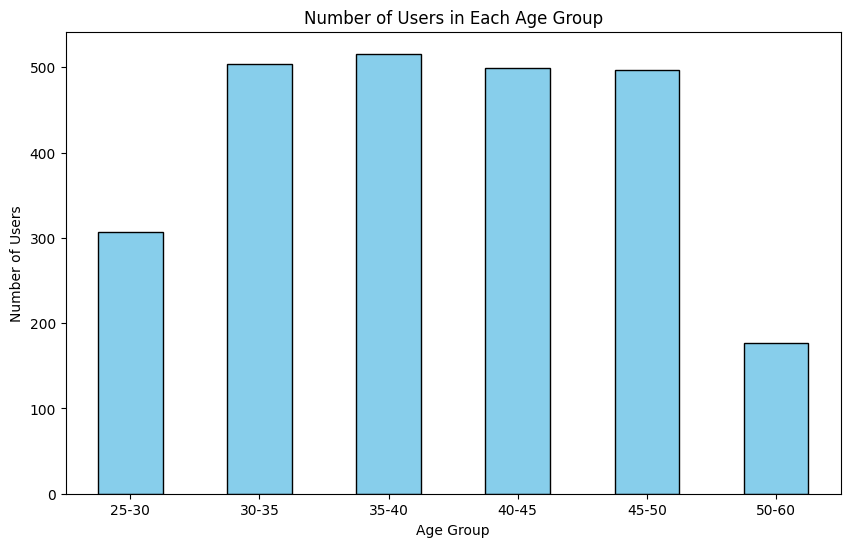

In [15]:
# Define age bins and labels
bins = [25, 30, 35, 40, 45, 50, 60]
labels = ['25-30', '30-35', '35-40', '40-45', '45-50', '50-60']

# Create a new column for age bins
userDatabase['Age Group'] = pd.cut(userDatabase['Age'], bins=bins, labels=labels, right=False)

# Count the number of users in each age group
age_group_counts = userDatabase['Age Group'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Users in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()


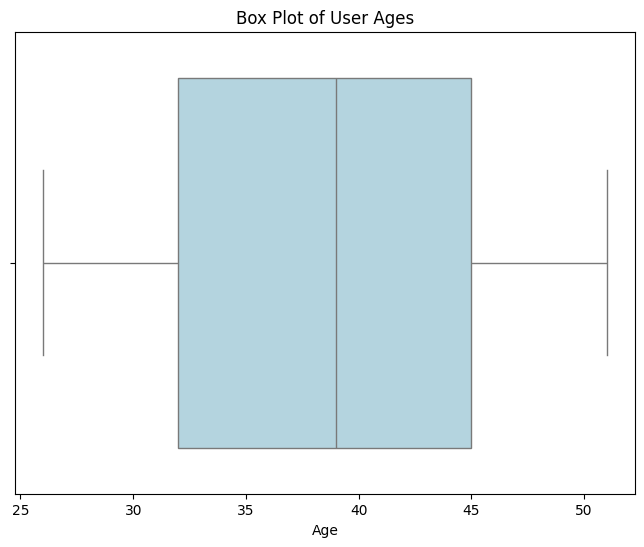

In [16]:
# Create a box plot for age distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=userDatabase['Age'], color='lightblue')
plt.title('Box Plot of User Ages')
plt.xlabel('Age')
plt.show()


In [17]:
userDatabase = userDatabase.drop('Age Group', axis=1)

**Key insights from the age group distribution bar chart:**

1. **Dominant Age Groups:** The age groups 30-35, 35-40, 40-45, and 45-50 each have over 500 users, representing the majority of the customer base. This suggests that middle-aged adults are the primary users of the service.

2. **Lower User Count in Younger and Older Age Groups:** The age groups 25-30 and 50-60 have significantly fewer users, with the lowest representation in the 50-60 age group. This indicates that both younger and older age demographics are less engaged with the service compared to middle-aged users.

3. **Targeting Opportunities:** Marketing efforts could be adjusted to focus on attracting more users in the 25-30 and 50-60 age brackets, where the service is currently underutilized.

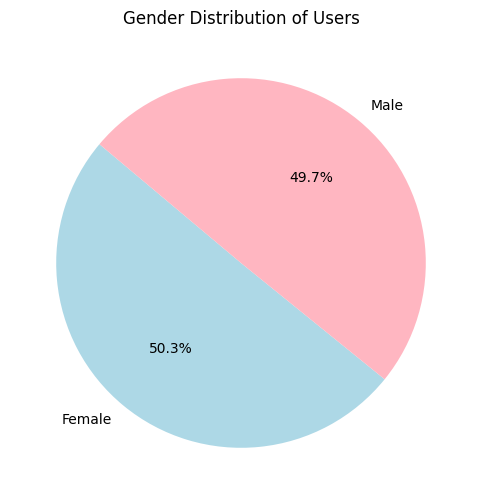

In [18]:
# Count the number of users by gender
gender_counts = userDatabase['Gender'].value_counts()

# Plot the gender distribution as a pie chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink'], startangle=140)
plt.title('Gender Distribution of Users')
plt.ylabel('')  # Hide the y-label as it's redundant in a pie chart
plt.show()


**Key insights from the gender distribution pie chart:**

1. **Almost Equal Distribution:** The gender distribution of users is nearly equal, with 50.3% female and 49.7% male. This suggests that the service appeals to both genders almost equally.

2. **Balanced Targeting:** Since there is no significant gender skew, marketing and engagement strategies can be designed to appeal to both males and females without needing to focus heavily on one specific gender group.

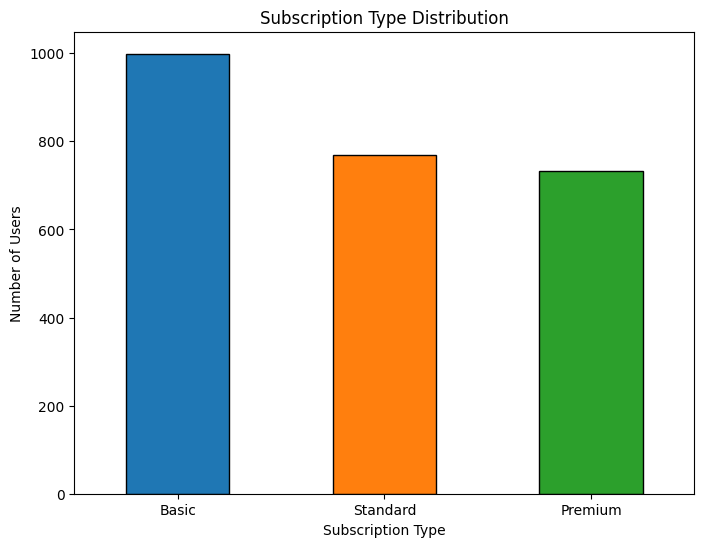

In [19]:
# Count the number of users by subscription type
subscription_counts = userDatabase['Subscription Type'].value_counts()

# Define a list of colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Add more colors if needed

# Plot the subscription type distribution as a bar chart with different colors
plt.figure(figsize=(8, 6))
subscription_counts.plot(kind='bar', color=colors[:len(subscription_counts)], edgecolor='black')
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()


**Key insights from the subscription type distribution bar chart:**

1. **Basic Plan Dominates:** The Basic subscription type is the most popular, with around 1000 users. This indicates that a significant portion of customers opt for the most affordable or minimal service offering.

2. **Standard and Premium Plans:** The Standard and Premium plans have a lower number of users, with both showing a fairly similar distribution, slightly under 800 users each. This suggests that fewer customers are opting for the higher-tier plans.

3. **Potential Upsell Opportunity:** Given the high adoption of the Basic plan, there is an opportunity to explore strategies to upsell customers to Standard or Premium plans, perhaps by highlighting added features or benefits.

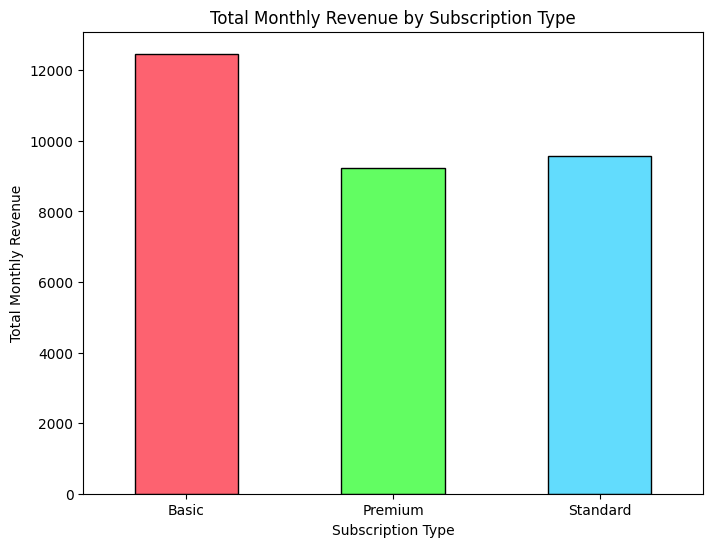

In [20]:
# Group the data by subscription type and sum the monthly revenue
revenue_by_subscription = userDatabase.groupby('Subscription Type')['Monthly Revenue'].sum()

# Define a list of colors for the bars
colors = ['#fd6270', '#62fd62', '#62dcfd'] # Add more colors if needed

# Plot the revenue by subscription type as a bar chart with different colors
plt.figure(figsize=(8, 6))
revenue_by_subscription.plot(kind='bar', color=colors[:len(revenue_by_subscription)], edgecolor='black')
plt.title('Total Monthly Revenue by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Total Monthly Revenue')
plt.xticks(rotation=0)
plt.show()


**Key insights from the total monthly revenue by subscription type bar chart:**

1. **Highest Revenue from Basic Plan:** Despite being a lower-tier plan, the Basic subscription type generates the highest total monthly revenue, surpassing both Premium and Standard plans. This is likely due to the large number of users subscribed to the Basic plan, as seen in previous charts.

2. **Premium and Standard Revenue:** The Premium and Standard plans generate similar levels of monthly revenue, though both are lower than the Basic plan. This indicates that fewer users are subscribed to these higher-tier plans, despite their potentially higher individual pricing.

3. **Potential to Increase Revenue:** Given that the Basic plan contributes the most to total revenue, there is an opportunity to maximize revenue by encouraging Basic users to upgrade to Premium or Standard plans, which may offer higher margins per customer.

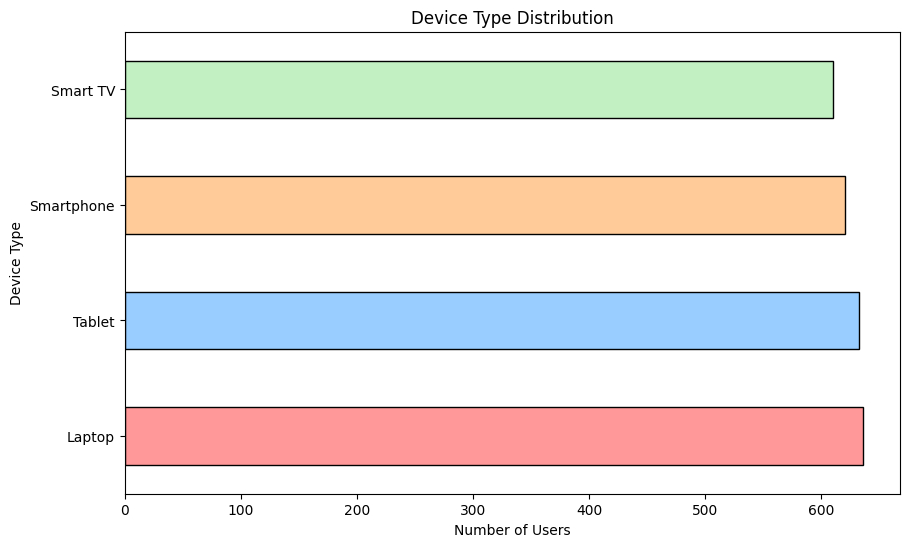

In [21]:
# Count the number of users by device type
device_counts = userDatabase['Device'].value_counts()

# Define a list of light colors for each device type
colors = ['#ff9999', '#99ccff', '#ffcc99', '#c2f0c2', '#f0e68c']  # Light red, light blue, light yellow, light green, light khaki

# Plot the device type counts as a horizontal bar chart with different colors
plt.figure(figsize=(10, 6))
device_counts.plot(kind='barh', color=colors[:len(device_counts)], edgecolor='black')
plt.title('Device Type Distribution')
plt.xlabel('Number of Users')
plt.ylabel('Device Type')
plt.show()


**Key insights from the device type distribution bar chart:**

1. **Even Device Usage:** The distribution of users across different device types is fairly even, with Laptops, Tablets, Smartphones, and Smart TVs all having between 500 and 600 users. This suggests that users are accessing the service across a variety of devices, without a strong preference for any single type.

2. **Laptops and Tablet Lead:** While the distribution is even, Laptops and Tablet slightly lead in usage, indicating that a slightly higher number of users prefer accessing the service on these devices compared to Tablets and Smart TVs.

3. **Multi-Device Strategy:** Given the relatively balanced usage across device types, it is important to ensure that the service provides an optimized user experience across all platforms. Marketing and feature development should cater to users on a wide range of devices.

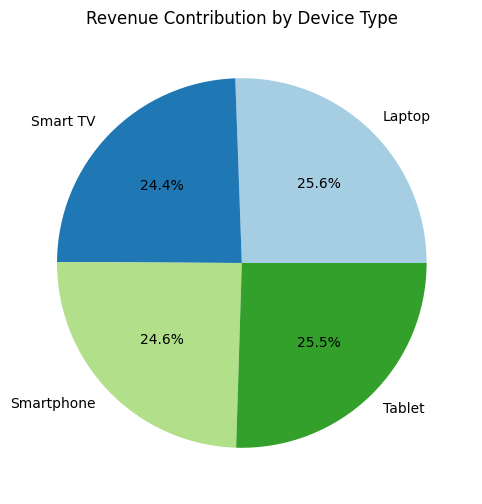

In [22]:
revenue_by_device = userDatabase.groupby('Device')['Monthly Revenue'].sum()
plt.figure(figsize=(8, 6))
revenue_by_device.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Revenue Contribution by Device Type')
plt.ylabel('')  # Hide the y-label as it's redundant in a pie chart
plt.show()


**Key insights from the revenue contribution by device type pie chart:**

1. **Balanced Revenue Distribution:** The revenue contribution across device types is nearly evenly split, with Laptops contributing the most (25.6%), followed closely by Tablets (25.5%), Smartphones (24.6%), and Smart TVs (24.4%).

2. **No Significant Revenue Outlier:** There is no single device type dominating the revenue contribution, indicating that users are generating revenue fairly equally regardless of the device they use to access the service.

3. **Consistent Device Revenue:** The balanced revenue contribution suggests that the service is well-adopted across various devices, providing flexibility in how customers engage with the platform.

# **Key strategies to improve subscription numbers and increase revenue based on the analysis:**

1. **Targeted Marketing Campaigns :**
  *   Focus on high-user countries (USA, Spain, Canada) with exclusive offers and expand into underrepresented regions (Asia, Africa).
  *   **Result:** Increased subscriptions in dominant regions and growth in underrepresented markets.

2. **Upsell and Cross-Sell Opportunities :**
  *   Encourage upgrades from Basic to Premium/Standard with incentives like feature highlights, discounts, or free trials.
  *   **Result:** Higher revenue from existing customers by increasing average subscription tier.

3. **Improve Customer Retention :**
  *   Use churn prediction to identify and retain at-risk users with personalized offers and content recommendations.
  *   **Result:** Reduced churn rates, leading to more stable recurring revenue.

4. **Target Specific Age Groups :**
  *   Develop campaigns targeting younger (25-30) and older (50-60) age groups with tailored offers (e.g., mobile features for younger users, family plans for older ones).
  *   **Result:** Increased engagement and subscriptions from underrepresented age demographics.

5. **Device-Specific Optimization :**
  *   Optimize the experience for mobile and TV users and offer device-targeted promotions (e.g., exclusive mobile features or Smart TV deals).
  *   **Result:** Enhanced user experience and higher retention across popular devices.

6. **Loyalty and Referral Programs :**
  *   Implement loyalty rewards and referral incentives to reward long-term subscribers and attract new ones through word-of-mouth.
  *   **Result:** Increased user retention and acquisition through customer-driven growth.


These strategies will help in improving subscriptions and driving revenue growth by focusing on targeted marketing, upselling, retention, and user engagement.






# **Model Development**

In [23]:
userDatabase

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Customer Churn
0,1,Basic,10,15-01-22,2023-06-10,United States,28,Male,Smartphone,1 Month,1
1,2,Premium,15,05-09-21,2023-06-22,Canada,35,Female,Tablet,1 Month,1
2,3,Standard,12,28-02-23,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,1
3,4,Standard,12,10-07-22,2023-06-26,Australia,51,Female,Laptop,1 Month,1
4,5,Basic,10,01-05-23,2023-06-28,Germany,33,Male,Smartphone,1 Month,1
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,2023-07-12,Spain,28,Female,Smart TV,1 Month,0
2496,2497,Basic,15,04-08-22,2023-07-14,Spain,33,Female,Smart TV,1 Month,0
2497,2498,Standard,12,09-08-22,2023-07-15,United States,38,Male,Laptop,1 Month,0
2498,2499,Standard,13,12-08-22,2023-07-12,Canada,48,Female,Tablet,1 Month,0


In [24]:
userDatabase.keys()

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration', 'Customer Churn'],
      dtype='object')

In [25]:
desired_columns = ['Subscription Type', 'Monthly Revenue', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration', 'Customer Churn']
userDatabase = userDatabase[desired_columns]

In [26]:
shape = userDatabase.shape

num_rows = shape[0]
num_columns = shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 2500
Number of columns: 8


In [27]:
userDatabase.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Plan Duration,Customer Churn
0,Basic,10,United States,28,Male,Smartphone,1 Month,1
1,Premium,15,Canada,35,Female,Tablet,1 Month,1
2,Standard,12,United Kingdom,42,Male,Smart TV,1 Month,1
3,Standard,12,Australia,51,Female,Laptop,1 Month,1
4,Basic,10,Germany,33,Male,Smartphone,1 Month,1


In [28]:
# Slice the first character (index 0) from 'Plan Duration' and convert to integer
userDatabase['Plan Duration'] = userDatabase['Plan Duration'].str[0].astype(int)

# Display the updated column
print(userDatabase['Plan Duration'].head())



0    1
1    1
2    1
3    1
4    1
Name: Plan Duration, dtype: int64


<ipython-input-28-6f749ec05c4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userDatabase['Plan Duration'] = userDatabase['Plan Duration'].str[0].astype(int)


In [29]:
userDatabase.isnull().sum()

,0
Subscription Type,0
Monthly Revenue,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0
Customer Churn,0


In [30]:
userDatabase.dtypes

,0
Subscription Type,object
Monthly Revenue,int64
Country,object
Age,int64
Gender,object
Device,object
Plan Duration,int64
Customer Churn,int64


In [31]:
userDatabase['Subscription Type'] = userDatabase['Subscription Type'].astype('category')
userDatabase['Country'] = userDatabase['Country'].astype('category')
userDatabase['Gender'] = userDatabase['Gender'].astype('category')
userDatabase['Device'] = userDatabase['Device'].astype('category')
userDatabase['Customer Churn'] = userDatabase['Customer Churn'].astype('category')

<ipython-input-31-33b7b406d05f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userDatabase['Subscription Type'] = userDatabase['Subscription Type'].astype('category')
<ipython-input-31-33b7b406d05f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userDatabase['Country'] = userDatabase['Country'].astype('category')
<ipython-input-31-33b7b406d05f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [32]:
userDatabase.dtypes

,0
Subscription Type,category
Monthly Revenue,int64
Country,category
Age,int64
Gender,category
Device,category
Plan Duration,int64
Customer Churn,category


In [33]:
userDatabase = pd.get_dummies(userDatabase, columns=['Subscription Type','Country','Gender','Device'], drop_first=True)
userDatabase

,Monthly Revenue,Age,Plan Duration,Customer Churn,Subscription Type_Premium,Subscription Type_Standard,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet
0,10,28,1,1,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
1,15,35,1,1,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,12,42,1,1,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False
3,12,51,1,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,10,33,1,1,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,14,28,1,0,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False
2496,15,33,1,0,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
2497,12,38,1,0,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False
2498,13,48,1,0,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True


In [34]:
for column in userDatabase.columns:
    if userDatabase[column].dtype == 'bool':
        userDatabase[column] = userDatabase[column].astype(int)

userDatabase

,Monthly Revenue,Age,Plan Duration,Customer Churn,Subscription Type_Premium,Subscription Type_Standard,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet
0,10,28,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
1,15,35,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,12,42,1,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0
3,12,51,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10,33,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,14,28,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2496,15,33,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2497,12,38,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
2498,13,48,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


In [35]:
userDatabase.corr()

,Monthly Revenue,Age,Plan Duration,Customer Churn,Subscription Type_Premium,Subscription Type_Standard,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet
Monthly Revenue,1.000000,-0.021143,NaN,0.007811,0.031439,-0.017198,-0.003676,-0.010808,0.016357,-0.026441,0.025463,-0.047384,0.012775,0.026373,0.014009,-0.006139,-0.008352,-0.042110,0.029007
Age,-0.021143,1.000000,NaN,-0.004695,-0.025388,0.021038,-0.018332,-0.005232,0.012295,0.009511,-0.009551,0.001372,0.000317,0.015507,0.008586,-0.039600,-0.008094,-0.005560,-0.006108
Plan Duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Churn,0.007811,-0.004695,NaN,1.000000,0.003014,-0.014659,0.028289,-0.030490,0.034561,0.028289,0.034561,0.028289,-0.059186,0.028289,-0.057061,0.011913,-0.025236,0.025231,-0.032764
Subscription Type_Premium,0.031439,-0.025388,NaN,0.003014,1.000000,-0.428885,-0.069682,-0.013057,0.314898,-0.170887,-0.167513,-0.181007,0.182277,-0.181007,0.029174,0.008000,0.018715,-0.022526,-0.007266
Subscription Type_Standard,-0.017198,0.021038,NaN,-0.014659,-0.428885,1.000000,-0.173826,-0.034871,-0.187141,-0.083946,-0.177154,0.408727,-0.021528,0.412056,-0.071136,0.008931,-0.006848,0.016512,0.011051
Country_Brazil,-0.003676,-0.018332,NaN,0.028289,-0.069682,-0.173826,1.000000,-0.107094,-0.078981,-0.078981,-0.078981,-0.078981,-0.131850,-0.078981,-0.131850,-0.009176,-0.016634,0.033917,-0.008249
Country_Canada,-0.010808,-0.005232,NaN,-0.030490,-0.013057,-0.034871,-0.107094,1.000000,-0.107094,-0.107094,-0.107094,-0.107094,-0.178780,-0.107094,-0.178780,0.005740,0.001825,0.003498,0.040736
Country_France,0.016357,0.012295,NaN,0.034561,0.314898,-0.187141,-0.078981,-0.107094,1.000000,-0.078981,-0.078981,-0.078981,-0.131850,-0.078981,-0.131850,0.003110,-0.005907,0.005483,-0.018843
Country_Germany,-0.026441,0.009511,NaN,0.028289,-0.170887,-0.083946,-0.078981,-0.107094,-0.078981,1.000000,-0.078981,-0.078981,-0.131850,-0.078981,-0.131850,-0.006105,-0.009483,-0.033613,-0.015312


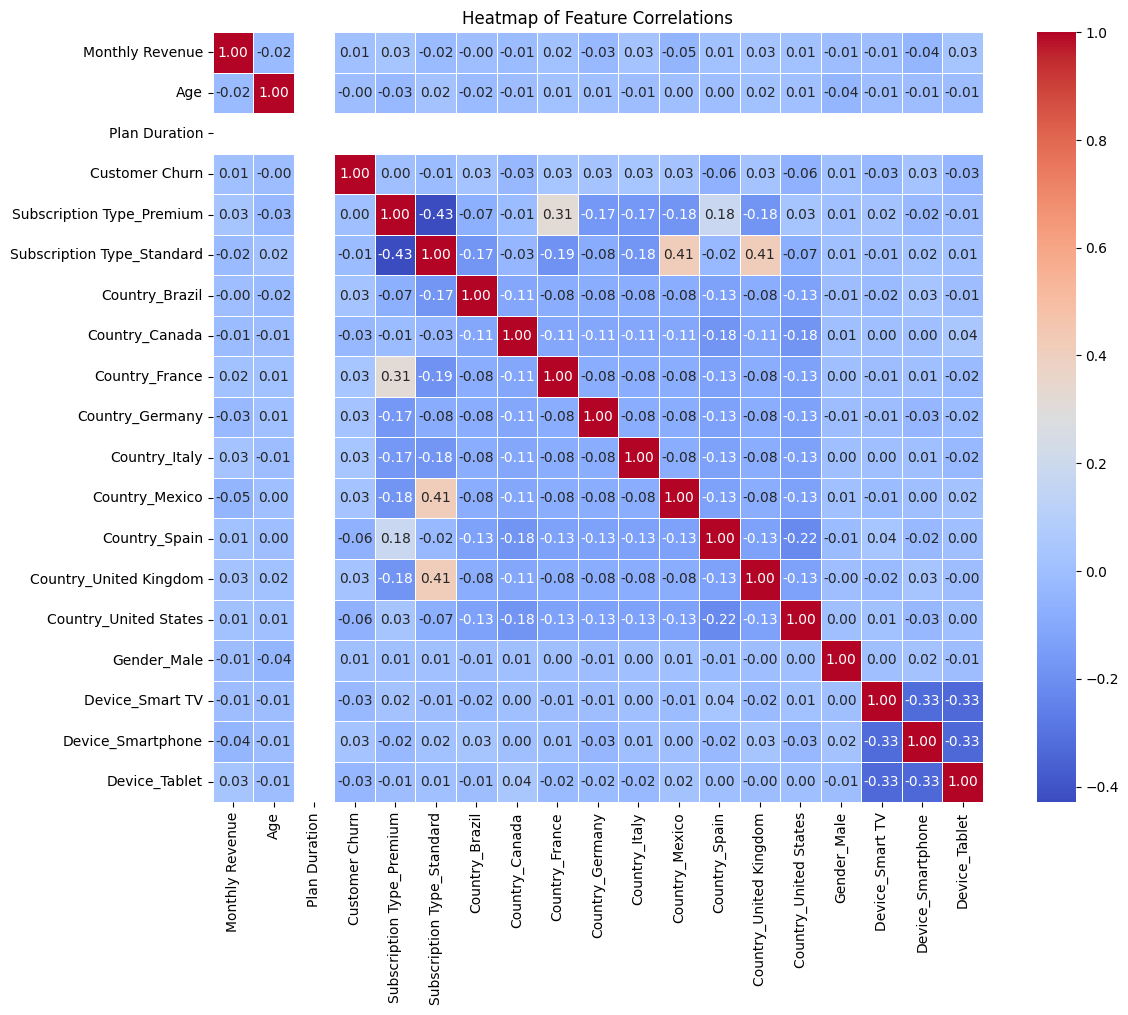

In [36]:
corr = userDatabase.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

plt.title('Heatmap of Feature Correlations')
plt.show()

In [37]:
userDatabase.loc[:, 'Customer Churn'] = userDatabase['Customer Churn'].replace({0: 'No', 1: 'Yes'})

In [38]:
target = userDatabase['Customer Churn']
print(target.value_counts(normalize=True))

Customer Churn
No     0.6012
Yes    0.3988
Name: proportion, dtype: float64


In [39]:
class_counts = userDatabase['Customer Churn'].value_counts()
print("Class Counts:")
print(class_counts)
is_balanced = (class_counts.min() / class_counts.max()) > 0.5
print("Is the data balanced?", is_balanced)

Class Counts:
Customer Churn
No     1503
Yes     997
Name: count, dtype: int64
Is the data balanced? True


In [40]:
predictors = userDatabase.drop(['Customer Churn'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1750, 18) (750, 18) (1750,) (750,)


In [41]:
modelDecisionTree = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 2)
modelDecisionTree.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'Country_United States <= 0.5\nentropy = 0.97\nsamples = 1750\nvalue = [1052, 698]\nclass = No'),
 Text(0.25, 0.5, 'Country_Spain <= 0.5\nentropy = 0.979\nsamples = 1444\nvalue = [846, 598]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.988\nsamples = 1123\nvalue = [633, 490]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.921\nsamples = 321\nvalue = [213, 108]\nclass = No'),
 Text(0.75, 0.5, 'Age <= 33.5\nentropy = 0.912\nsamples = 306\nvalue = [206, 100]\nclass = No'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.996\nsamples = 84\nvalue = [39, 45]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.808\nsamples = 222\nvalue = [167, 55]\nclass = No')]

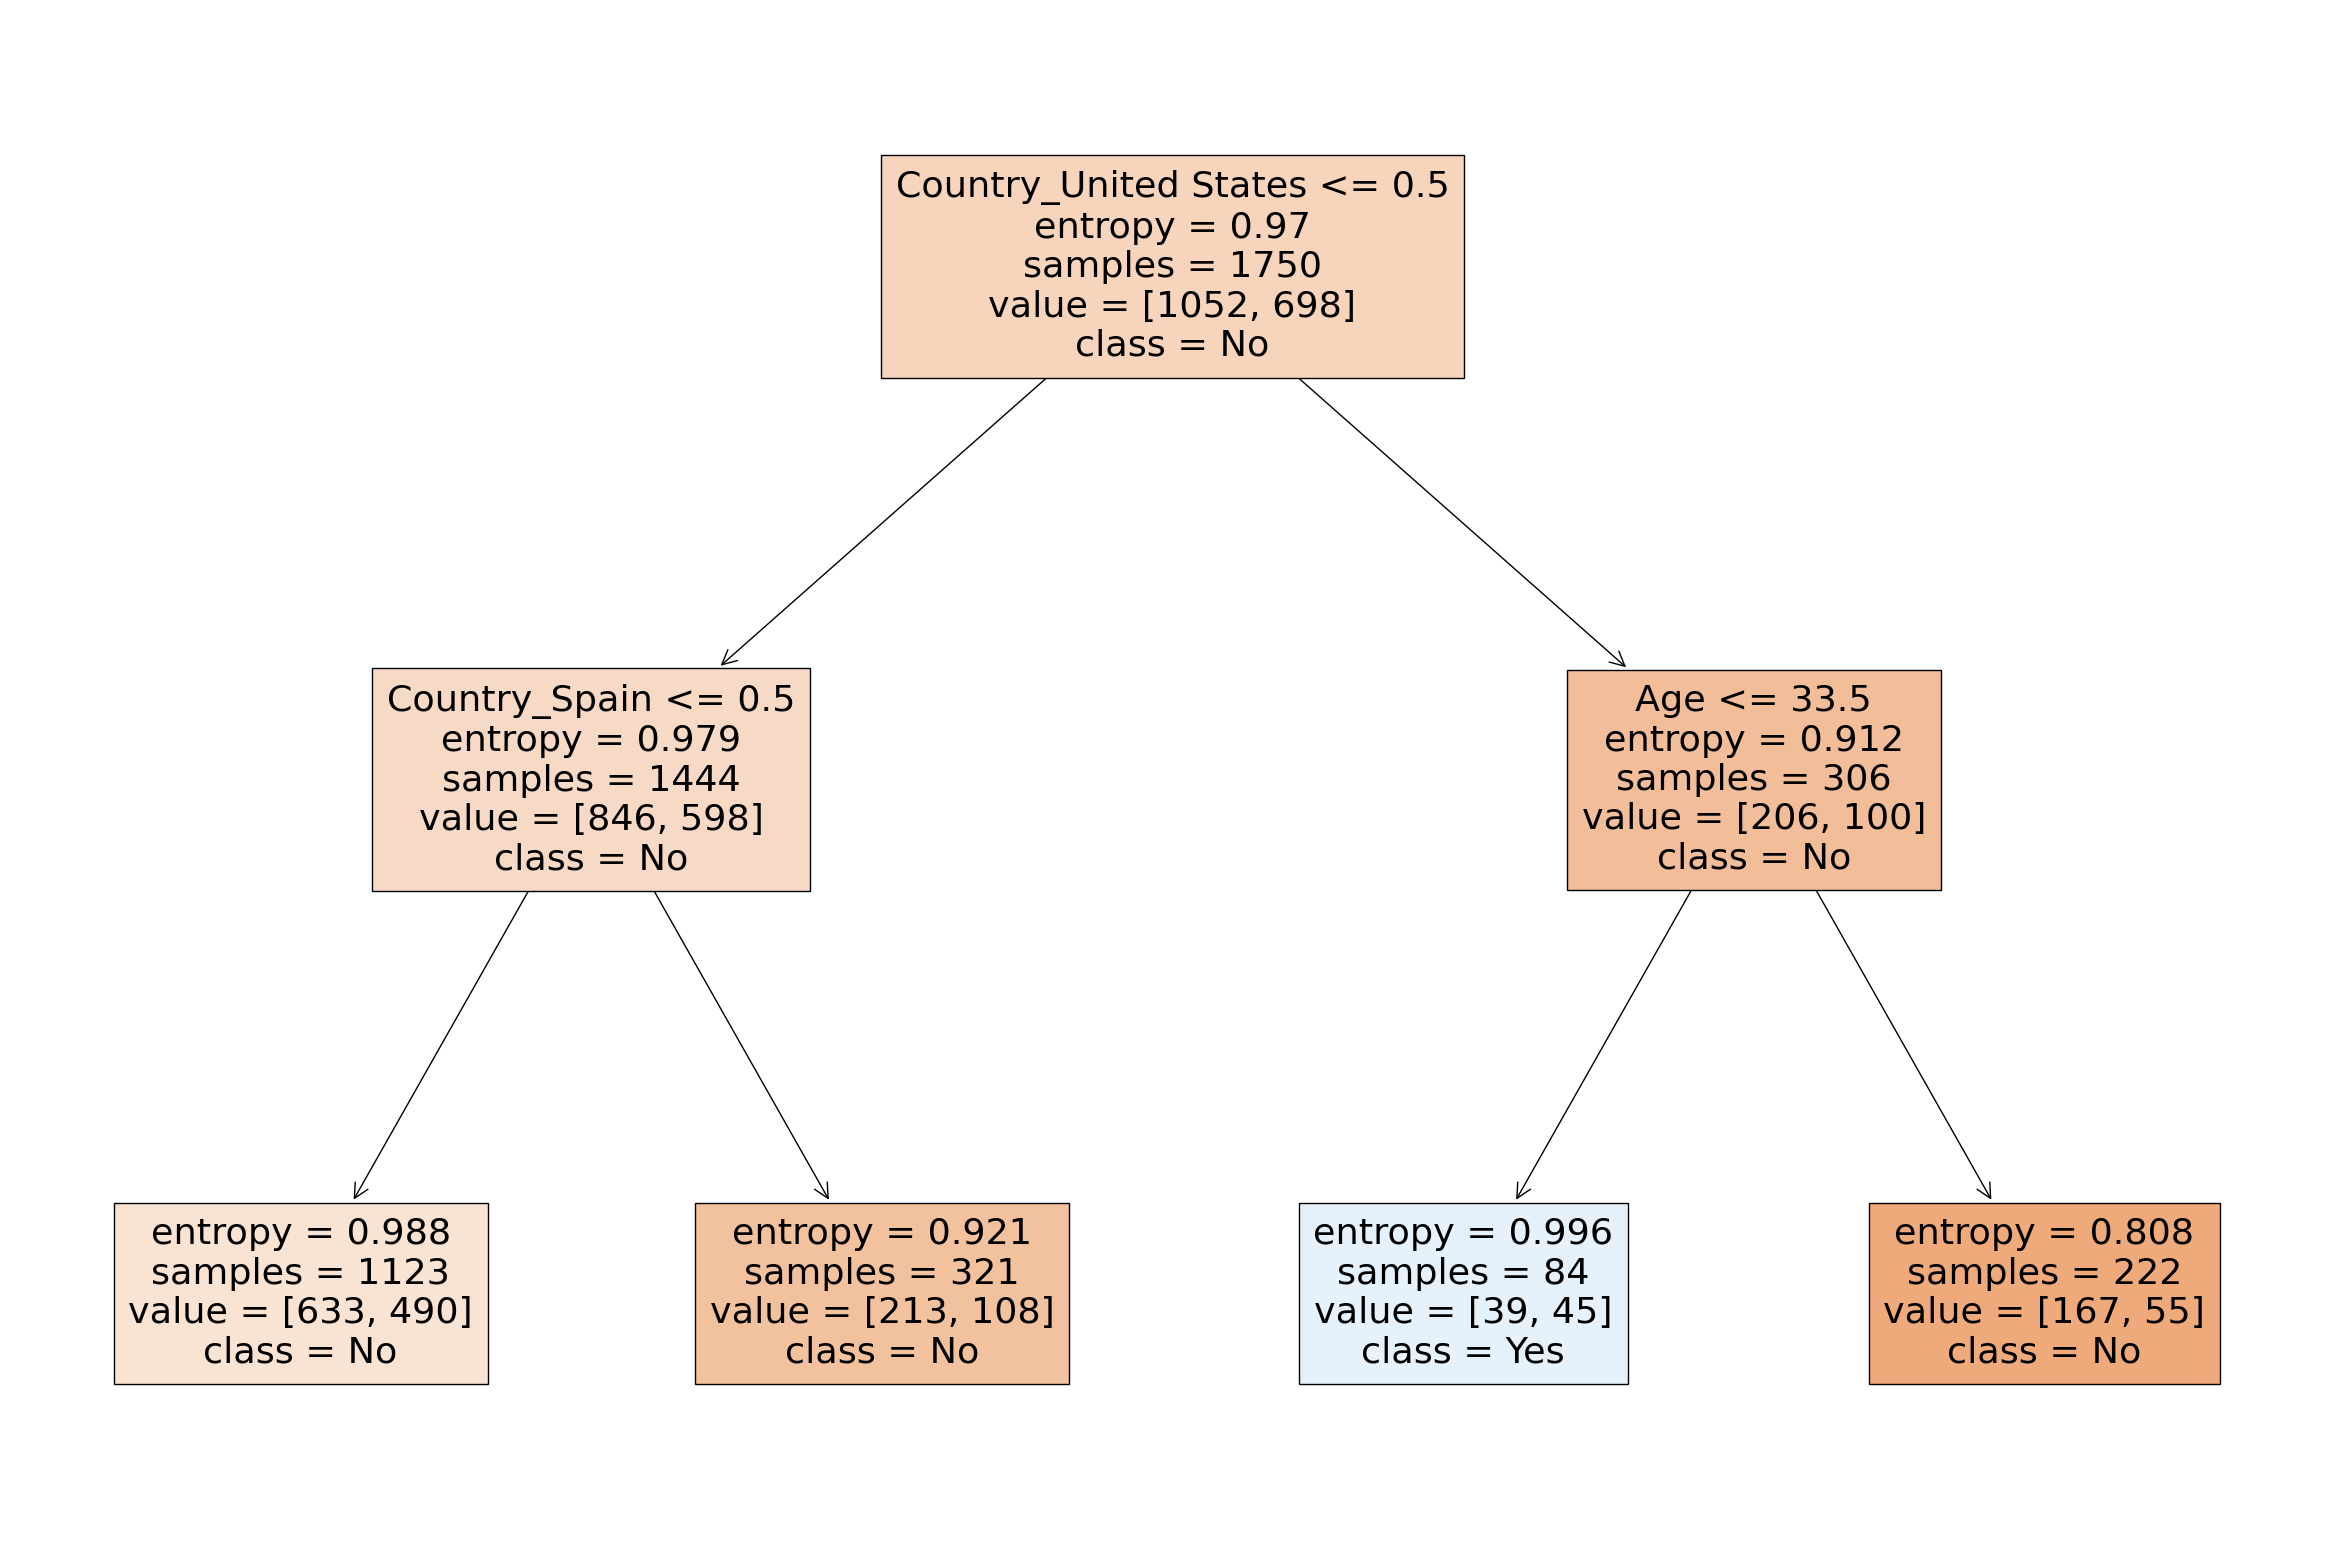

In [42]:
fig = plt.figure(figsize=(30,20))
tree.plot_tree(modelDecisionTree,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [43]:
prediction_on_test = modelDecisionTree.predict(predictors_test)

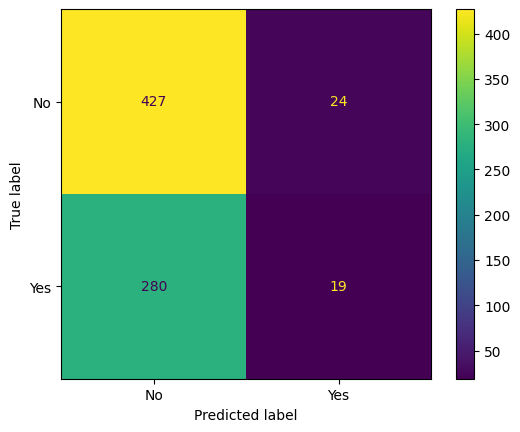

In [44]:
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelDecisionTree.classes_).plot()

In [45]:
print(classification_report(target_test, prediction_on_test))


              precision    recall  f1-score   support

          No       0.60      0.95      0.74       451
         Yes       0.44      0.06      0.11       299

    accuracy                           0.59       750
   macro avg       0.52      0.51      0.42       750
weighted avg       0.54      0.59      0.49       750



**Result**

**Accuracy:** Accuracy: The overall accuracy of the model is 0.59, which suggests that the model is biased toward predicting the majority class (non-churn customers).

# **Feature Engineering**

**Here are the key steps we followed during feature engineering:**

1. **Subscription Tenure:** Calculated the duration between the Join Date and Last Payment Date to understand how long each customer has been subscribed.
2. **Total Revenue Generated:** Created a new feature by multiplying the Subscription Tenure by the Monthly Revenue, giving us a sense of the customer’s total contribution.

In [46]:
userDatabase['Join Date'] = Dataset['Join Date']
userDatabase['Last Payment Date'] = Dataset['Last Payment Date']

userDatabase['Join Date'] = pd.to_datetime(userDatabase['Join Date'], format='%d-%m-%y')
userDatabase['Last Payment Date'] = pd.to_datetime(userDatabase['Last Payment Date'], format='%d-%m-%y')

In [47]:
userDatabase['Subscription Tenure (Months)'] = (userDatabase['Last Payment Date'] - userDatabase['Join Date']).dt.days // 30

userDatabase['Total Revenue Generated'] = userDatabase['Monthly Revenue'] * userDatabase['Subscription Tenure (Months)']

In [48]:
userDatabase = userDatabase.drop(['Join Date', 'Last Payment Date'], axis=1)


In [49]:
userDatabase

,Monthly Revenue,Age,Plan Duration,Customer Churn,Subscription Type_Premium,Subscription Type_Standard,Country_Brazil,Country_Canada,Country_France,Country_Germany,...,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet,Subscription Tenure (Months),Total Revenue Generated
0,10,28,1,Yes,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,17,170
1,15,35,1,Yes,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,21,315
2,12,42,1,Yes,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,3,36
3,12,51,1,Yes,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,11,132
4,10,33,1,Yes,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,14,28,1,No,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,11,154
2496,15,33,1,No,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,11,165
2497,12,38,1,No,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,11,132
2498,13,48,1,No,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,11,143


In [50]:
predictors = userDatabase.drop(['Customer Churn'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1750, 20) (750, 20) (1750,) (750,)


In [51]:
modelDecisionTree = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 2)
modelDecisionTree.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'Subscription Tenure (Months) <= 7.5\nentropy = 0.97\nsamples = 1750\nvalue = [1052, 698]\nclass = No'),
 Text(0.25, 0.5, 'Subscription Tenure (Months) <= 6.5\nentropy = 0.409\nsamples = 122\nvalue = [10, 112]\nclass = Yes'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47]\nclass = Yes'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.567\nsamples = 75\nvalue = [10, 65]\nclass = Yes'),
 Text(0.75, 0.5, 'Subscription Tenure (Months) <= 12.5\nentropy = 0.943\nsamples = 1628\nvalue = [1042, 586]\nclass = No'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.916\nsamples = 1557\nvalue = [1042, 515]\nclass = No'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 71\nvalue = [0, 71]\nclass = Yes')]

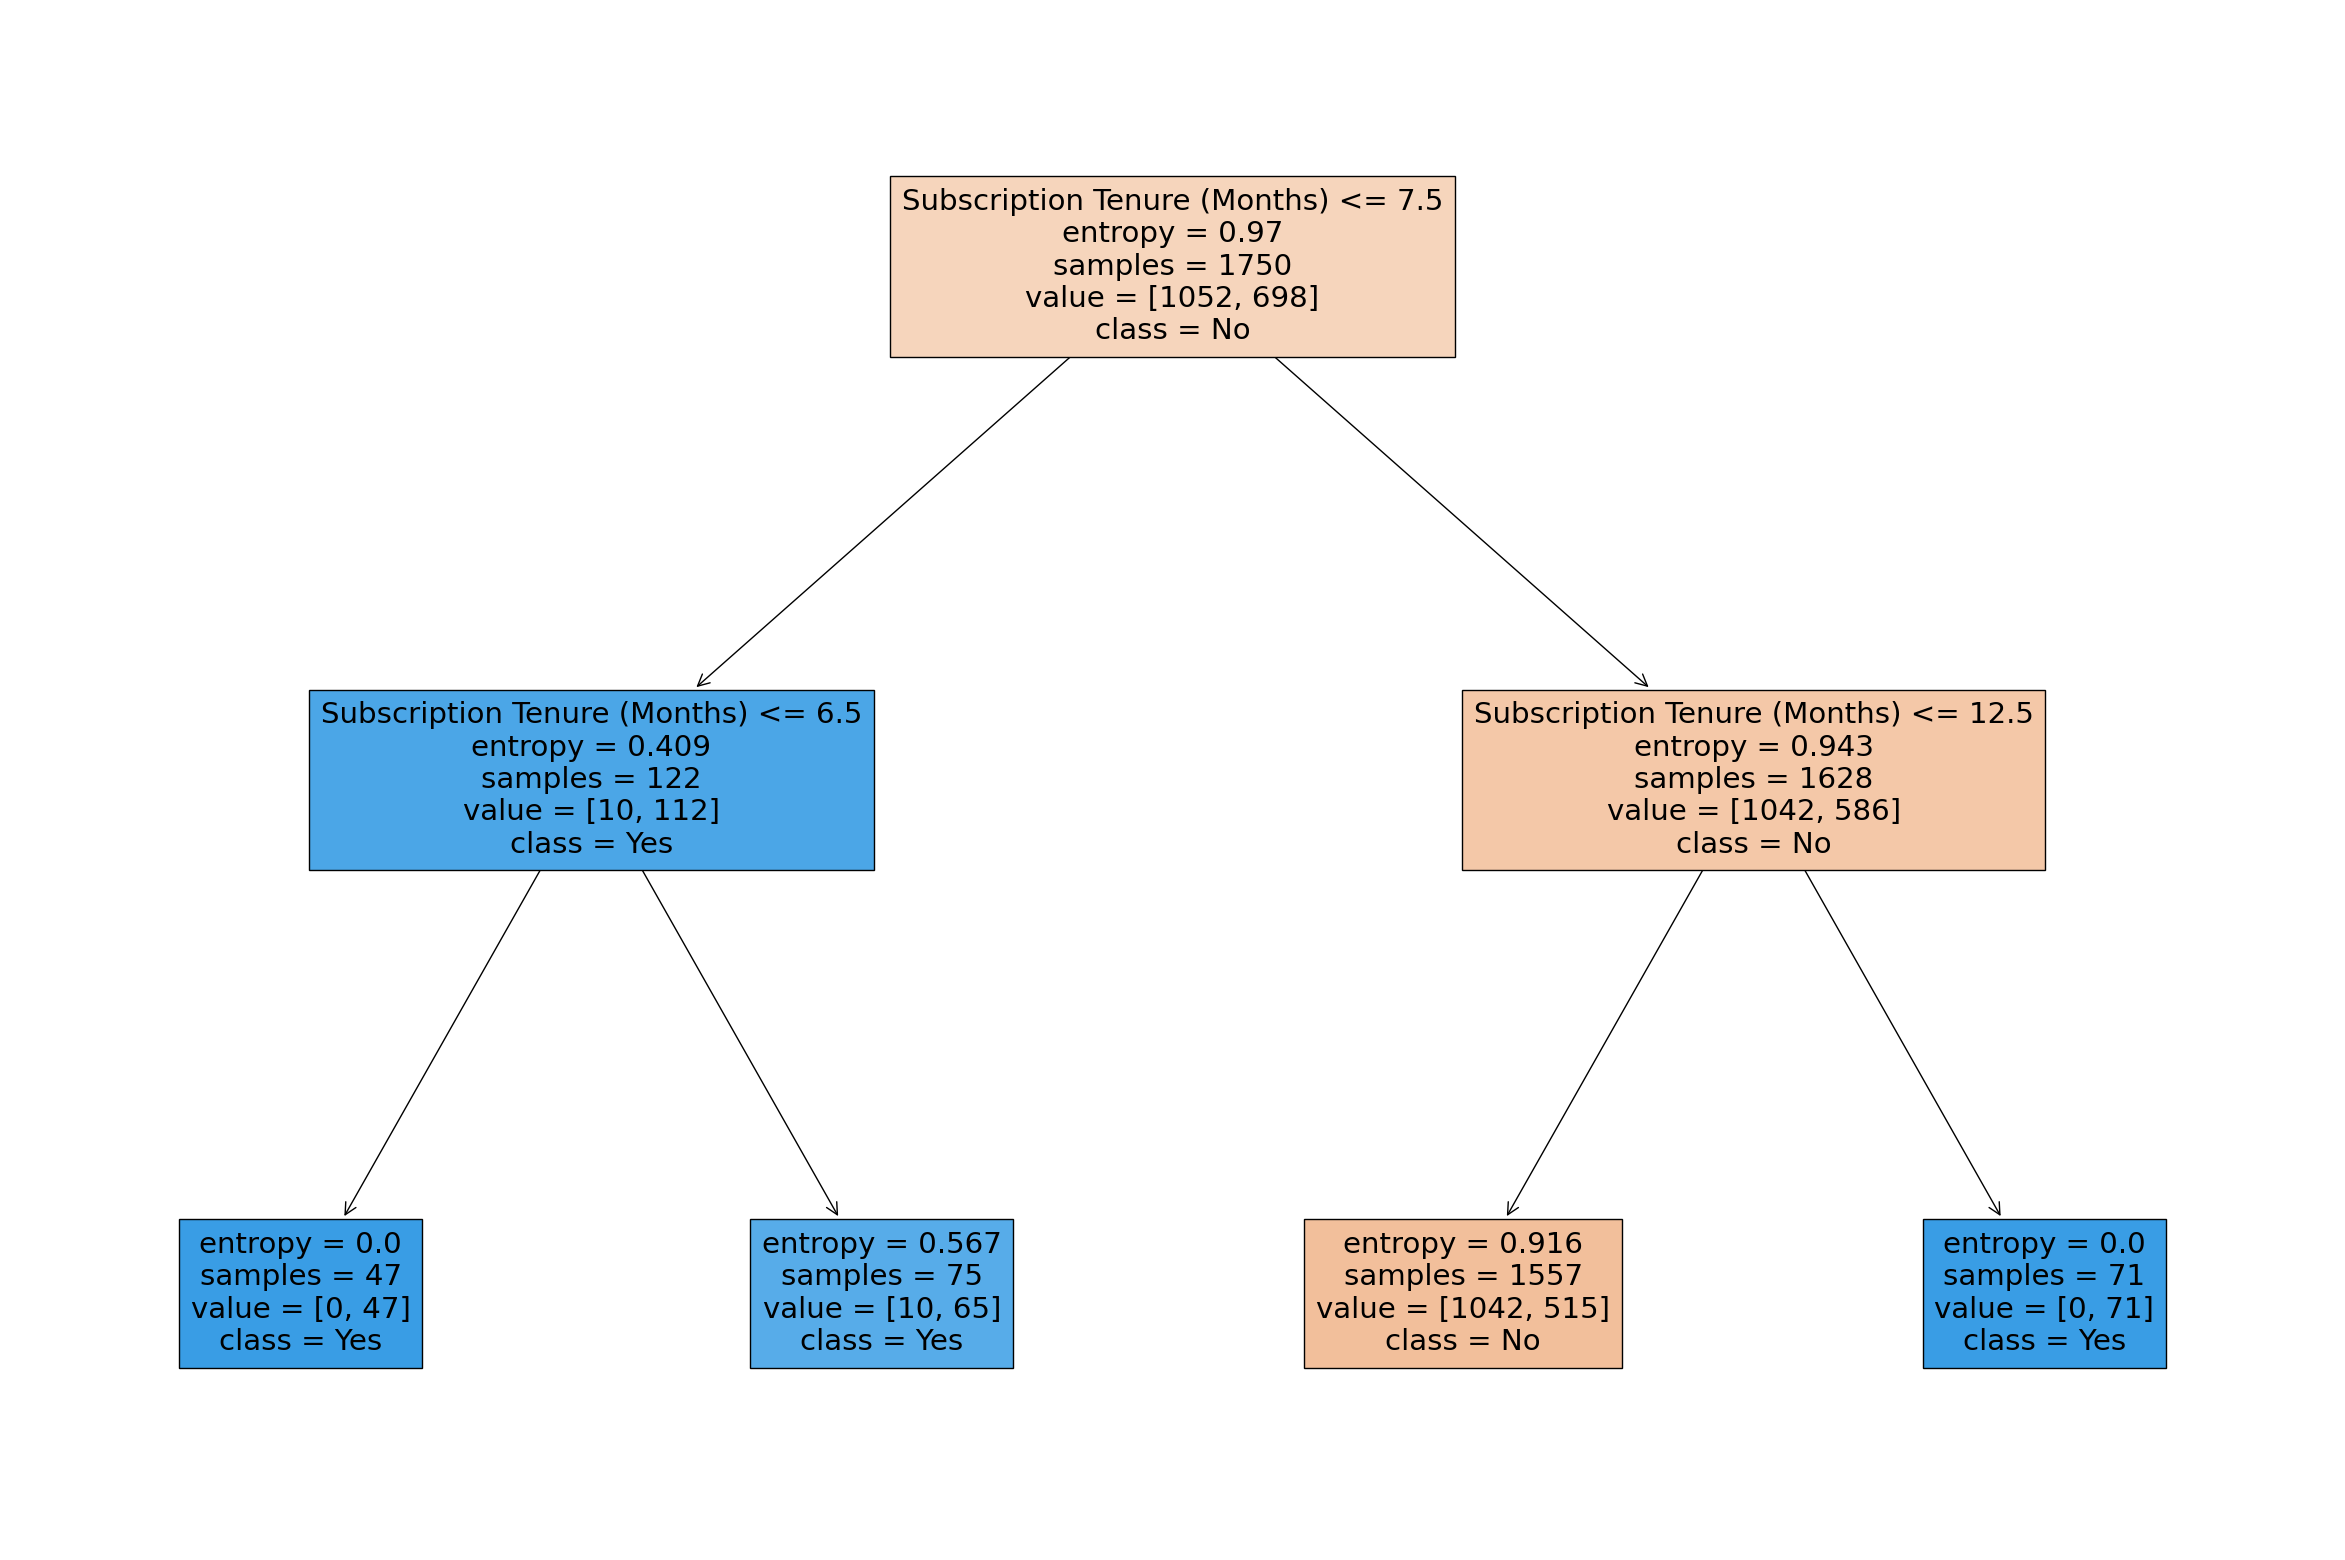

In [52]:
fig = plt.figure(figsize=(30,20))
tree.plot_tree(modelDecisionTree,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [53]:
prediction_on_test = modelDecisionTree.predict(predictors_test)


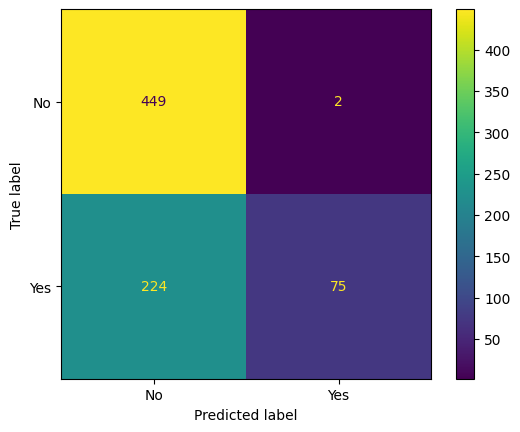

In [54]:
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelDecisionTree.classes_).plot()

In [55]:
print(classification_report(target_test, prediction_on_test))


              precision    recall  f1-score   support

          No       0.67      1.00      0.80       451
         Yes       0.97      0.25      0.40       299

    accuracy                           0.70       750
   macro avg       0.82      0.62      0.60       750
weighted avg       0.79      0.70      0.64       750



**Result:**

**Accuracy:** Overall accuracy increased to 0.70, showing an improvement in the model's ability to generalize.

# **Conclusion:**


In conclusion, feature engineering significantly enhanced the model's performance, improving both precision and accuracy. The precision for predicting churned customers increased substantially, and **overall accuracy rose from 0.59 to 0.70**. While recall for churned customers improved, further optimization is still needed to enhance the model's ability to detect churn cases more effectively.